In [6]:
#load libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [12]:
#load dataset
(x_train, y_train),(x_test, y_test)= imdb.load_data(num_words=10000)

In [14]:
#pad-sequences
x_train= pad_sequences(x_train,maxlen=200)
x_test= pad_sequences(x_test,maxlen=200)


In [16]:
#build
model= Sequential([
    Embedding(input_dim=10000,output_dim=32,input_length=200),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
#compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
#train
history= model.fit(
    x_train,y_train,
    epochs=5,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5490 - loss: 0.6845 - val_accuracy: 0.7924 - val_loss: 0.4932
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8503 - loss: 0.3751 - val_accuracy: 0.8528 - val_loss: 0.3391
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9355 - loss: 0.1795 - val_accuracy: 0.8524 - val_loss: 0.3540
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9769 - loss: 0.0948 - val_accuracy: 0.8322 - val_loss: 0.4626
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9852 - loss: 0.0622 - val_accuracy: 0.8588 - val_loss: 0.3645


In [24]:
#evaluate
loss,acc=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.3850
Test Accuracy: 0.8510


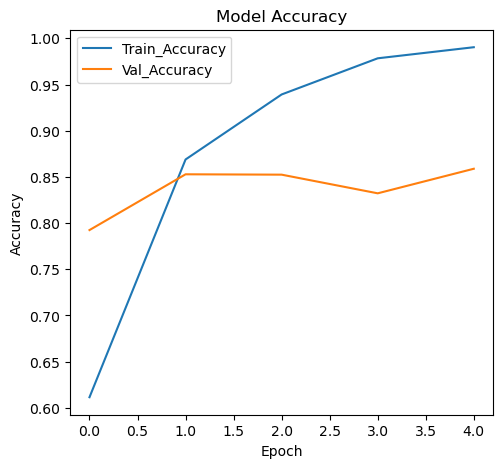

In [26]:
#visualize

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train_Accuracy")
plt.plot(history.history['val_accuracy'], label="Val_Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

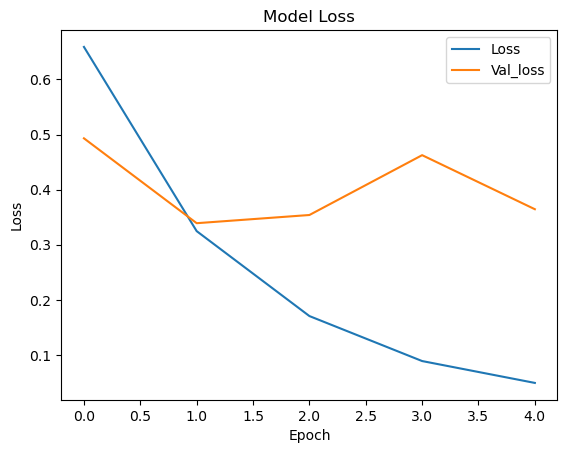

In [28]:
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val_loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()